## Sociale media en studieresultaten
We willen nagaan of er een verband bestaat tussen het gebruik van sociale media en de prestaties van studenten. We vragen aan 1064 studenten hoeveel uren ze gemiddeld per dag met sociale media bezig zijn. Onder sociale media verstaan we Facebook, YouTube, blogs, Twitter, MySpace en LinkedIn. We gaan ook na wat de eindscore is van deze studenten op het einde van het jaar. Het resultaat van deze enquête vind je in het bestand "socialeMediaVsPunten.csv".

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
local = False

if local:
    oefenFolder = '../'
else:
    from google.colab import drive

    drive.mount('/content/drive')

    #vervang dit naar het pad in Google Drive waar jou datasets staan
    !rm / content / oefeningen
    !ln -s "/content/drive/Shareddrives/Data Science 1/2020-21/Lesmateriaal/6 samenhang/oefeningen" "/content/oefeningen"
    !ls -la / content / oefeningen
    oefenFolder = '/content/oefeningen/'
    #
    #   #we moeten ook het script uitschieters.py kunnen importeren.
    #   #daarom moeten we dit script in de folder "/content" copieren.
    !cp "/content/drive/Shareddrives/Data Science 1/2020-21/Lesmateriaal/5 centrum en spreiding/oefeningen/hulpfuncties.py" "/content/"
# 
print('de folder met datasets = ' + oefenFolder + 'datasets/')

Mounted at /content/drive
rm: cannot remove '/': Is a directory
rm: cannot remove 'content': No such file or directory
rm: cannot remove '/': Is a directory
rm: cannot remove 'oefeningen': No such file or directory
ls: cannot access 'content': No such file or directory
lrwxrwxrwx 1 root root   86 Apr 13 20:14 oefeningen -> '/content/drive/Shareddrives/Data Science 1/2020-21/Lesmateriaal/6 samenhang/oefeningen'

/:
total 104
drwxr-xr-x   1 root root 4096 Apr 13 20:11 .
drwxr-xr-x   1 root root 4096 Apr 13 20:11 ..
drwxr-xr-x   1 root root 4096 Apr  7 13:27 bin
drwxr-xr-x   2 root root 4096 Apr 24  2018 boot
drwxr-xr-x   1 root root 4096 Apr 13 20:14 content
drwxr-xr-x   1 root root 4096 Apr 12 13:54 datalab
drwxr-xr-x   5 root root  360 Apr 13 20:11 dev
-rwxr-xr-x   1 root root    0 Apr 13 20:11 .dockerenv
drwxr-xr-x   1 root root 4096 Apr 13 20:11 etc
drwxr-xr-x   2 root root 4096 Apr 24  2018 home
drwxr-xr-x   1 root root 4096 Apr  7 13:29 lib
drwxr-xr-x   2 root root 4096 Apr  7 13:1

1. lees dit bestand in. Let erop dat het aantal uren als getallen wordt gelezen. Verwijder de rijen waar
een onbekende waarde staat. Verwijder nu de rijen met uitschieters (maak eventueel gebruik van de hulpfuncties.py uit de oefeningen van centrummaten). Hoeveel rijen schieten er over?

In [ ]:
from hulpfuncties import *

socialeMediaVsPunten = pd.read_csv(oefenFolder + 'datasets/socialeMediaVsPunten.csv', na_values=['onbekend'], sep=',',
                                   decimal='.')
socialeMediaVsPunten.head()
socialeMediaVsPunten.dtypes

,uren,punten
0,0.70,15
1,0.68,18
2,1.50,14
3,2.40,6
4,0.00,18


uren      float64
punten      int64
dtype: object

In [ ]:
print(socialeMediaVsPunten.sort_values(by='uren'))
socialeMediaVsPunten.dropna(inplace=True)
socialeMediaVsPntZU = socialeMediaVsPunten[~uitschieters(socialeMediaVsPunten.uren)]
print(f"Aantal rijen dat overblijft:{len(socialeMediaVsPntZU)}")

     uren  punten
242  0.00       9
4    0.00      18
828  0.01       1
510  0.01      10
631  0.02       7
..    ...     ...
284  3.88      17
191  3.93      18
536  4.17       3
651  4.20      14
662   NaN       0

[1064 rows x 2 columns]
Aantal rijen dat overblijft:1058


2. maak een histogram van de uren en de punten apart

(array([ 68., 106., 109.,  98., 137., 120.,  95.,  77.,  84.,  43.,  53.,
         29.,  18.,  17.,   4.]),
 array([0.  , 0.23, 0.46, 0.69, 0.92, 1.15, 1.38, 1.61, 1.84, 2.07, 2.3 ,
        2.53, 2.76, 2.99, 3.22, 3.45]),
 <a list of 15 Patch objects>)

[Text(0, 0.5, 'frequentie'),
 Text(0.5, 0, 'uren op, sociale media'),
 Text(0.5, 1.0, 'verdeling van tijd op sociale media')]

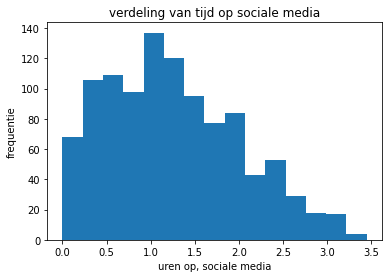

In [ ]:
ax = plt.axes()
ax.hist(x=socialeMediaVsPntZU.uren, bins=15)
# we kunnen de settings ook in  commando doorgeven
ax.set(xlabel='uren op, sociale media', ylabel='frequentie', title='verdeling van tijd op sociale media')
plt.show()

(array([ 28.,  17.,  21.,  70.,  55.,  57., 161.,  75.,  79., 181.,  78.,
         65.,  92.,  46.,  31.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        ]),
 <a list of 15 Patch objects>)

Text(0.5, 0, 'punten')

Text(0, 0.5, 'frequentie')

Text(0.5, 1.0, 'puntenverdeling')

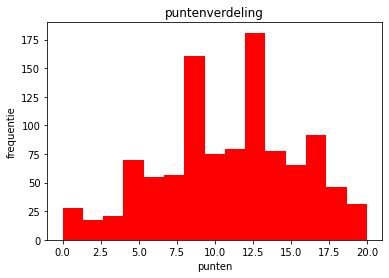

In [ ]:
ax = plt.axes()
ax.hist(x=socialeMediaVsPntZU.punten, bins=15, range=[0, 20], color='red')
# we kunnen ook meerdere set commando's geven 
ax.set_xlabel('punten')
ax.set_ylabel('frequentie')
ax.set_title('puntenverdeling')
plt.show()

3. wat is het gemiddeld aantal uren dat een student aan sociale media spendeert?

In [ ]:
socialeMediaVsPntZU.uren.mean()

1.264111531190925

4. wat is de standaardafwijking van het aantal uren? Wat betekent dit?

In [ ]:
socialeMediaVsPntZU.uren.std()

0.7578589912098026

Meer dan 97,5% van de studenten besteed minder dan 2,76 uur per dag aan sociale media.


 

5. wat is de gemiddelde score van de studenten?



---



In [ ]:
socialeMediaVsPntZU.punten.mean()  #gemiddelde

10.99054820415879

6. wat is de standaardafwijking van de score?


---



In [ ]:
socialeMediaVsPntZU.punten.std()  #standaardafwijking

6.080810697118652

7. maak een scatterplot van de 2 variabelen. Welke correlatie verwacht je?


[(0.0, 20.0),
 Text(0, 0.5, 'Punten'),
 Text(0.5, 0, 'Uren per dag op sociale media'),
 Text(0.5, 1.0, 'Social media vs punten')]

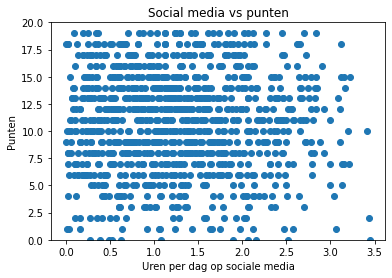

In [ ]:
ax = plt.axes()
ax.scatter(x=socialeMediaVsPntZU.uren, y=socialeMediaVsPntZU.punten)
ax.set(title="Social media vs punten", xlabel="Uren per dag op sociale media", ylabel="Punten",
       ylim=(0, 20))  # anders is de y-schaal van 0 tot 100
plt.show()

Correlatie zou ongeveer nul zijn



8. bereken de correlatie tussen de 2 variabelen. Doe dit ook eens via de Z-scores (Pearson). Wat besluit je?

In [ ]:
socialeMediaVsPntZU.corr(method='pearson')

zscores_soc_ptn = pd.DataFrame(stats.zscore(socialeMediaVsPntZU))
corZ = (zscores_soc_ptn[0] * zscores_soc_ptn[1]).mean()
print(corZ)  # geeft hetzelfde uiteraard

,uren,punten
uren,1.000000,-0.008996
punten,-0.008996,1.000000


De berekening via de Z-scores en via de corr methode is op afronding na gelijk t.t.z. bijna nul. dit is ook duidelijk uit de scatterplot

9. welke rangcorrelatie vind je volgens Kendall? Wat betekent deze waarde?

In [ ]:
socialeMediaVsPntZU.corr(method='kendall')

,uren,punten
uren,1.000000,-0.006119
punten,-0.006119,1.000000


10. heeft het zin om hier een regressielijn te bepalen? Waarom wel/niet? Bepaal de regressielijn als dit zin heeft

In [ ]:
# Omdat r en Kendall T bijna nul zijn heeft dit geen zin, Als er geen correlatie is dan is er geen lineair verband en uit de scatterplot zien we ook geen mogelijk ander verband.
